In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

#### Import V1 libraries 

In [2]:
dfcoralv1=pd.read_csv('../Data/CoralV1.csv')

C:\Users\asmar\AppData\Local\Temp\ipykernel_10820\1589819291.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dfcoralv1=pd.read_csv('../Data/CoralV1.csv')


# Treatment of outliers

In [3]:
dfcoralv1.isnull().sum()

Site_ID                                    0
Sample_ID                                 23
Data_Source                               23
Latitude_Degrees                          23
Longitude_Degrees                         23
Ocean_Name                                23
Reef_ID                                12540
Realm_Name                                23
Ecoregion_Name                            26
Country_Name                              24
State_Isla_Province_Name                 122
City_Town_Name                          1155
Distance_to_Shore                         25
Exposure                                  23
Turbidity                                 29
Cyclone_Frequency                         23
Date_Month                                23
Date_Year                                 23
Depth_m                                 1817
Substrate_Name                         12668
Percent_Cover                          12455
Bleaching_Level                        18830
Percent_Bl

### 

In [4]:
#Index(['Sample_ID', 'Latitude_Degrees', 'Longitude_Degrees',
    #   'Distance_to_Shore', 'Turbidity', 'Cyclone_Frequency', 'Date_Month',
     #  'Date_Year', 'Depth_m', 'Percent_Cover', 'Percent_Bleaching', 'ClimSST',
      # 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum',
#'Temperature_Maximum', 'Temperature_Kelvin_Staard_Deviation', 'Wispeed',
 #      'SSTA', 'SSTA_Staard_Deviation', 'SSTA_Mean', 'SSTA_Minimum',
  #     'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Staard_Deviation',
   #    'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
    #   'SSTA_DHW_Staard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
     #  'TSA_Staard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
      # 'TSA_Frequency', 'TSA_Frequency_Staard_Deviation', 'TSA_FrequencyMax',
#'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Staard_Deviation',
 #      'TSA_DHWMax', 'TSA_DHWMean'],
  #    dtype='object')

#### filling the missing values using median value

In [5]:
#for i in ['Latitude_Degrees', 'Longitude_Degrees','Distance_to_Shore', 'Turbidity', 'Cyclone_Frequency', 'Date_Month',
  #     'Date_Year', 'Depth_m', 'Percent_Cover', 'Percent_Bleaching', 'ClimSST',
   #    'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum',
    #   'Temperature_Maximum', 'Temperature_Kelvin_Staard_Deviation', 'Wispeed',
     #  'SSTA', 'SSTA_Staard_Deviation', 'SSTA_Mean', 'SSTA_Minimum',
      # 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Staard_Deviation',
       #'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       #'SSTA_DHW_Staard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       #'TSA_Staard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       #'TSA_Frequency', 'TSA_Frequency_Staard_Deviation', 'TSA_FrequencyMax',
       #'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Staard_Deviation',
       #'TSA_DHWMax', 'TSA_DHWMean']:
    #dfcoralv1[i].fillna(dfcoralv1[i].median())

#### missing values with KNN imputer

In [6]:
impute=KNNImputer()

In [7]:
for i in dfcoralv1.select_dtypes(include='number').columns:
    dfcoralv1[i]=impute.fit_transform(dfcoralv1[[i]])

In [8]:
dfcoralv1.isnull().sum()

Site_ID                                    0
Sample_ID                                  0
Data_Source                               23
Latitude_Degrees                           0
Longitude_Degrees                          0
Ocean_Name                                23
Reef_ID                                12540
Realm_Name                                23
Ecoregion_Name                            26
Country_Name                              24
State_Isla_Province_Name                 122
City_Town_Name                          1155
Distance_to_Shore                          0
Exposure                                  23
Turbidity                                  0
Cyclone_Frequency                          0
Date_Month                                 0
Date_Year                                  0
Depth_m                                    0
Substrate_Name                         12668
Percent_Cover                              0
Bleaching_Level                        18830
Percent_Bl

#### check datatypes 

In [9]:
dfcoralv1.dtypes

Site_ID                                 object
Sample_ID                              float64
Data_Source                             object
Latitude_Degrees                       float64
Longitude_Degrees                      float64
Ocean_Name                              object
Reef_ID                                 object
Realm_Name                              object
Ecoregion_Name                          object
Country_Name                            object
State_Isla_Province_Name                object
City_Town_Name                          object
Distance_to_Shore                      float64
Exposure                                object
Turbidity                              float64
Cyclone_Frequency                      float64
Date_Month                             float64
Date_Year                              float64
Depth_m                                float64
Substrate_Name                          object
Percent_Cover                          float64
Bleaching_Lev

#### outlier treatment 

In [10]:
#Distance_to_Shore, Turbidity, Cyclone_Frequency, Depth_m, Percent_Cover, Percent_Bleaching, ClimSST,Temperature_Kelvin,
#Wispeed, SSTA, 

#decide the outlier treatment on basis of mean and maximum value and what values must be removed for outliers

In [11]:
def wisker(col):
    q1, q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [12]:
#check for single column
wisker (dfcoralv1['Depth_m'])

(-5.0, 19.0)

In [13]:
#use for loop for all columns to be treated for the outlier treatment
for i in ['Latitude_Degrees', 'Longitude_Degrees','Distance_to_Shore', 'Turbidity', 'Cyclone_Frequency', 'Date_Month',
          'Depth_m', 'Percent_Cover', 'Percent_Bleaching', 'ClimSST',
          'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum',
           'Temperature_Maximum', 'Temperature_Kelvin_Staard_Deviation', 'Wispeed',
           'SSTA', 'SSTA_Staard_Deviation', 'SSTA_Mean', 'SSTA_Minimum',
           'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Staard_Deviation',
           'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
           'SSTA_DHW_Staard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
           'TSA_Staard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
           'TSA_Frequency', 'TSA_Frequency_Staard_Deviation', 'TSA_FrequencyMax',
           'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Staard_Deviation',
           'TSA_DHWMax', 'TSA_DHWMean']:
        lw,uw=wisker(dfcoralv1[i])
        dfcoralv1[i]=np.where(dfcoralv1[i]<lw,lw,dfcoralv1[i])
        dfcoralv1[i]=np.where(dfcoralv1[i]>uw,uw,dfcoralv1[i])


### check the outlier graphs 

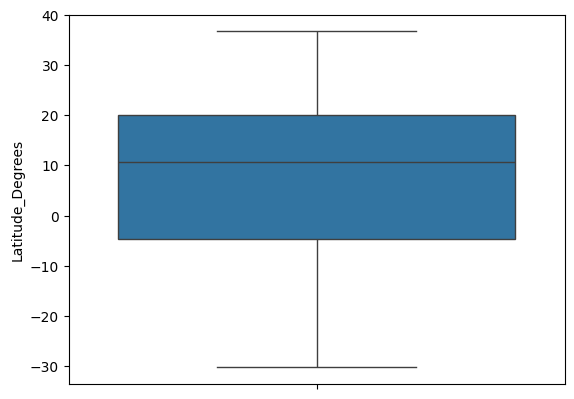

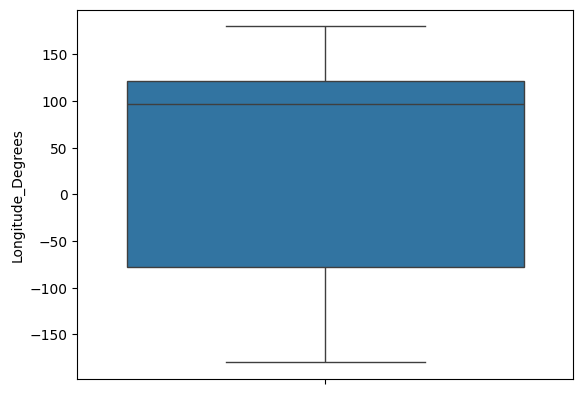

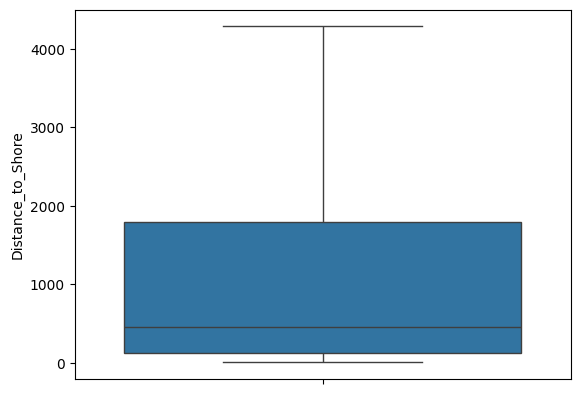

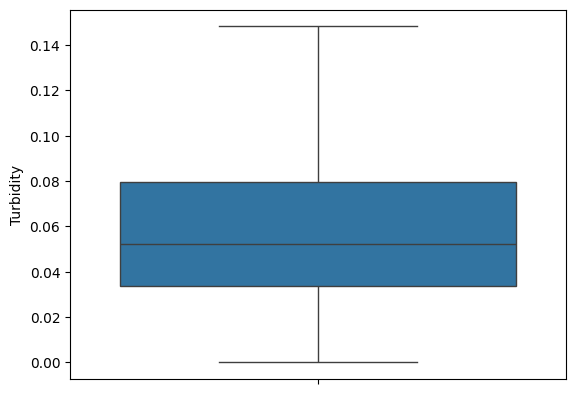

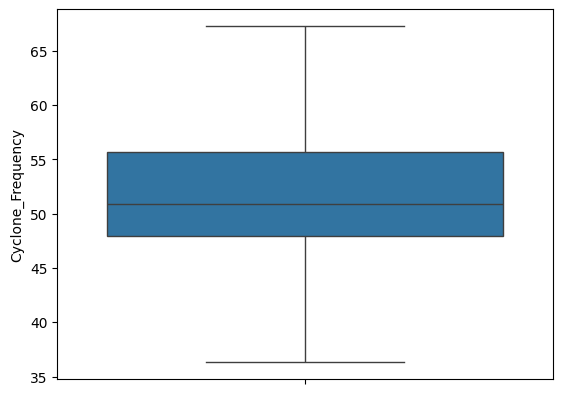

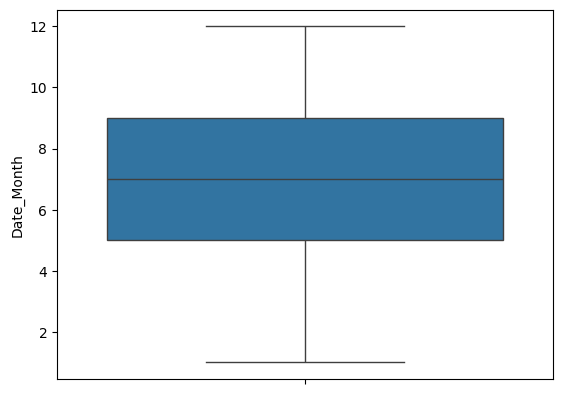

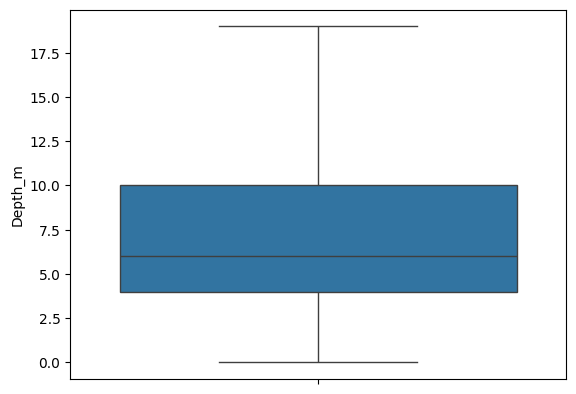

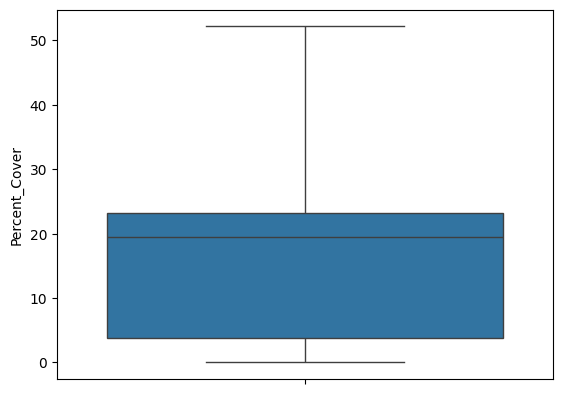

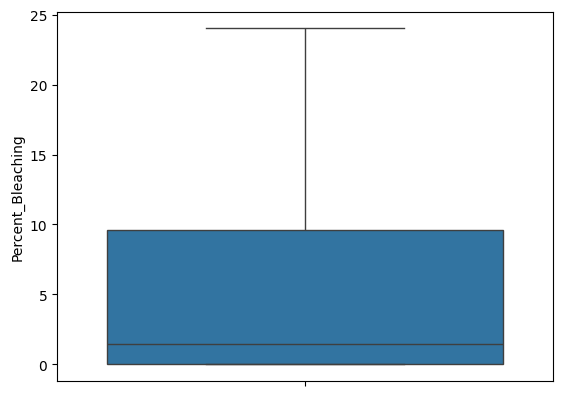

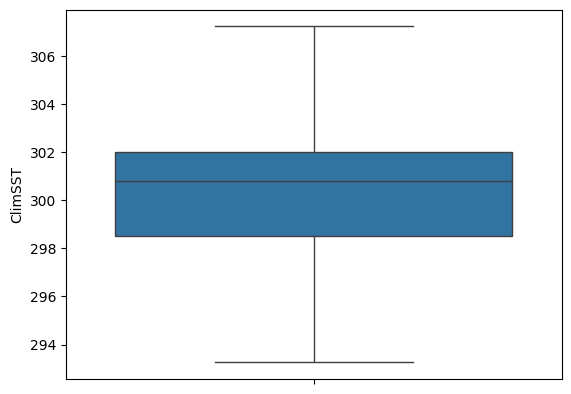

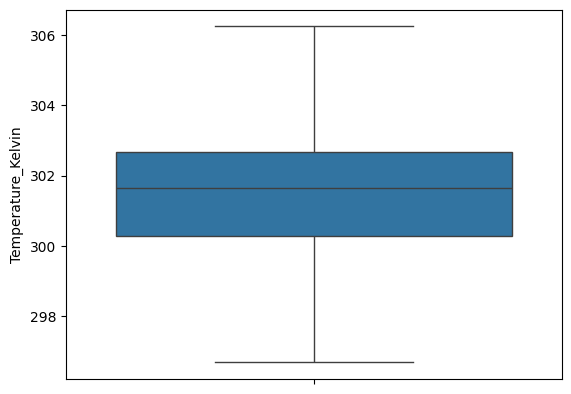

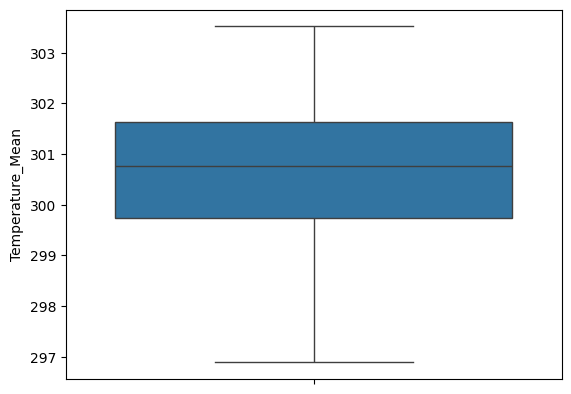

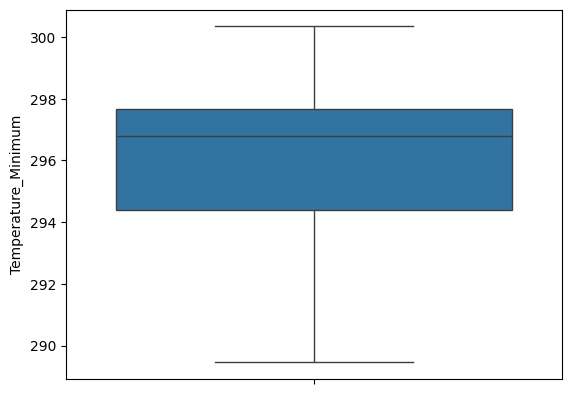

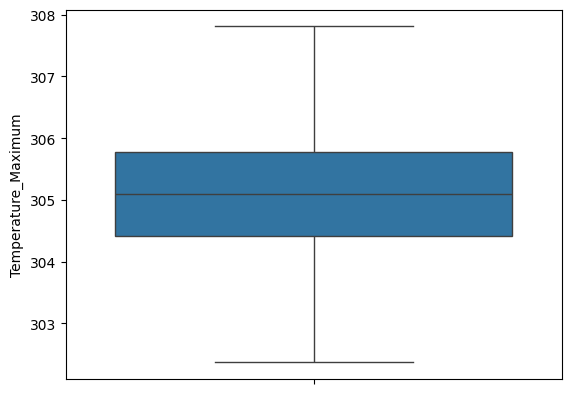

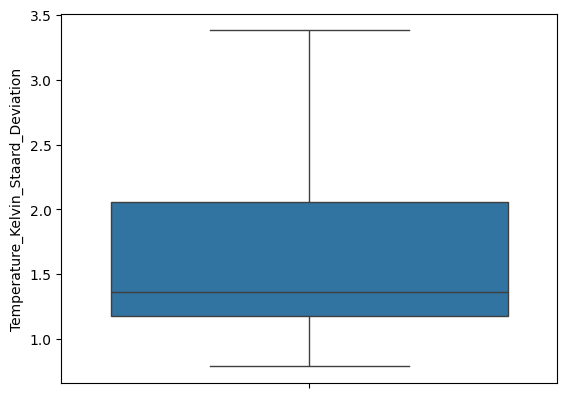

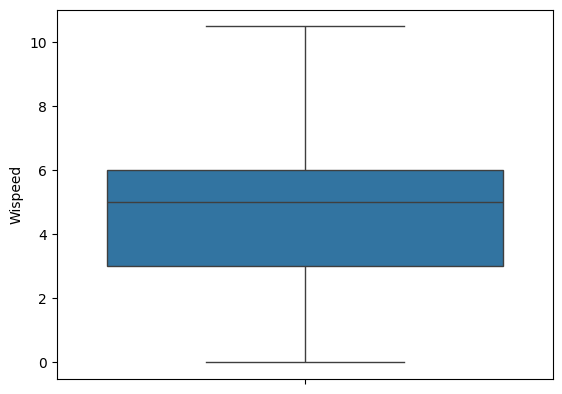

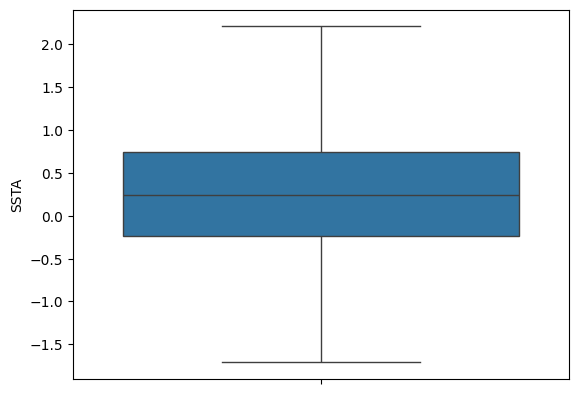

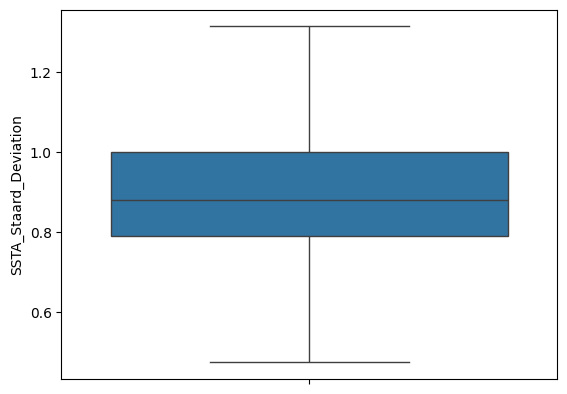

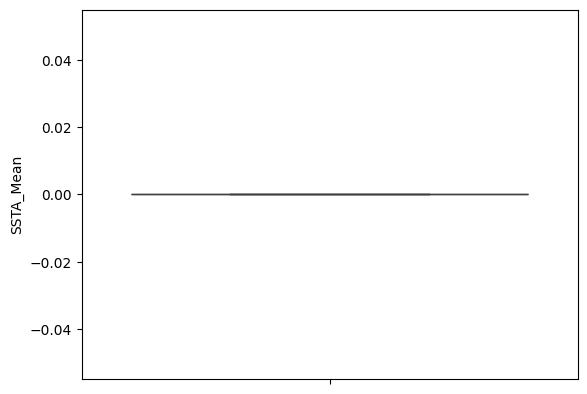

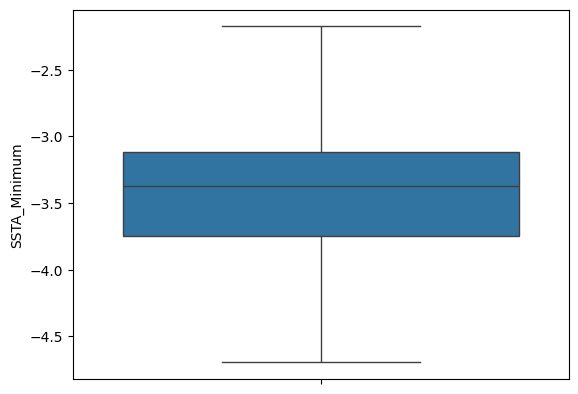

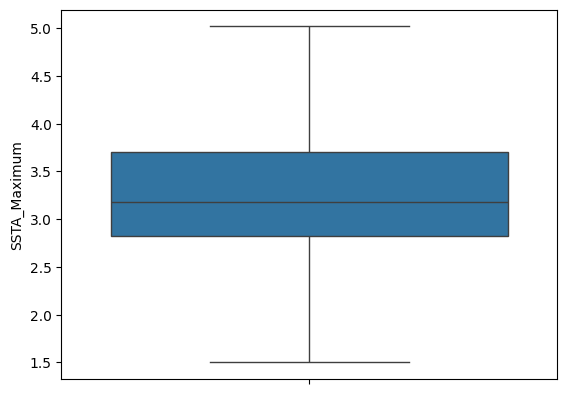

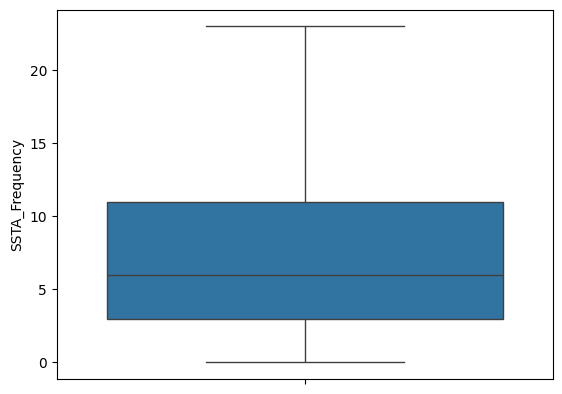

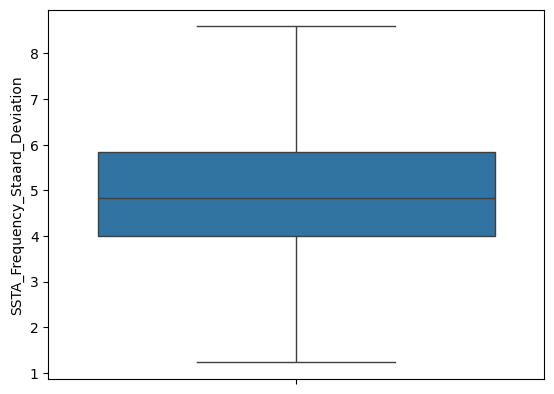

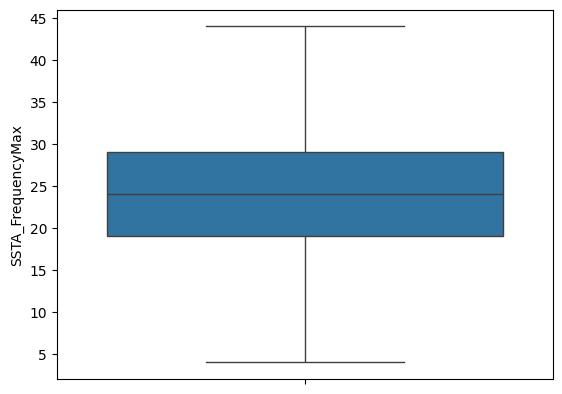

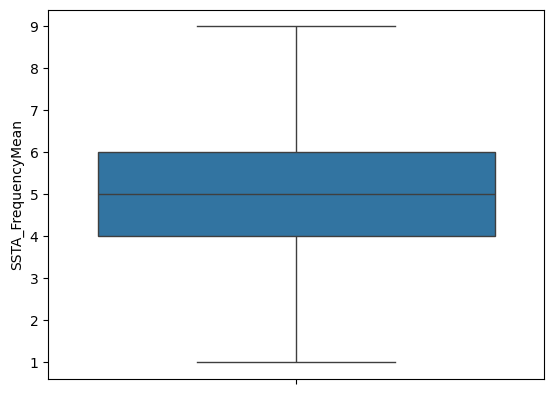

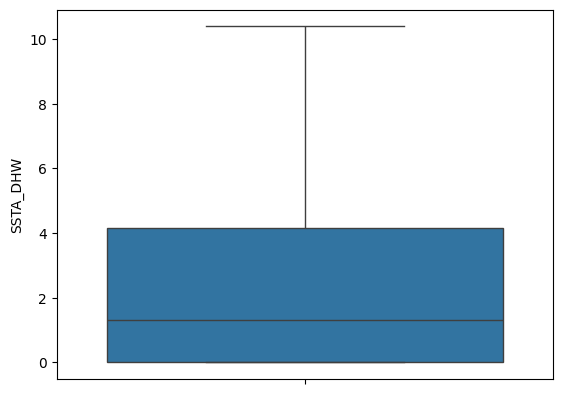

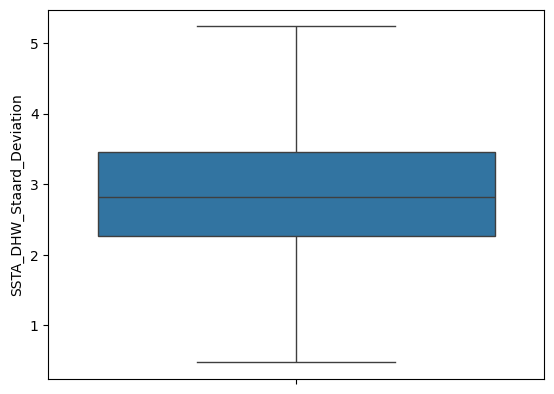

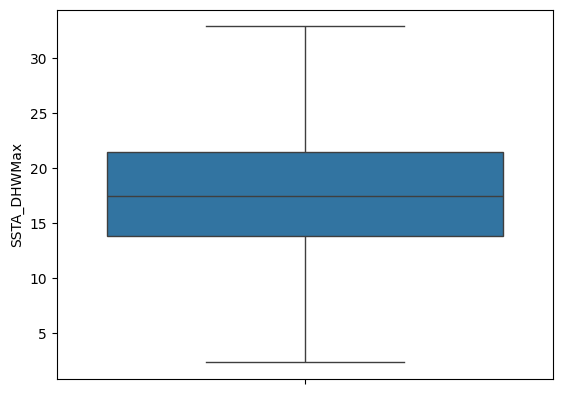

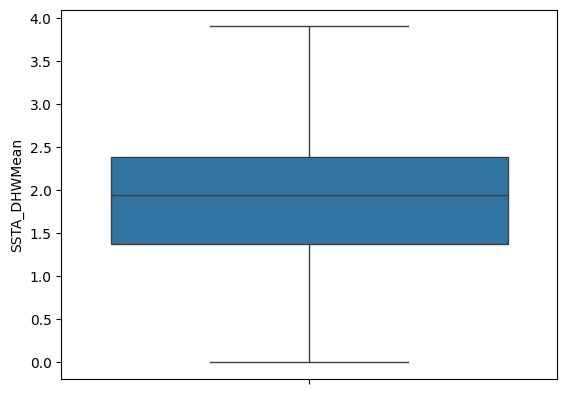

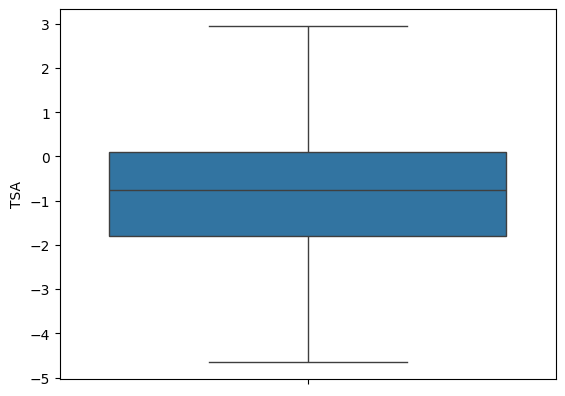

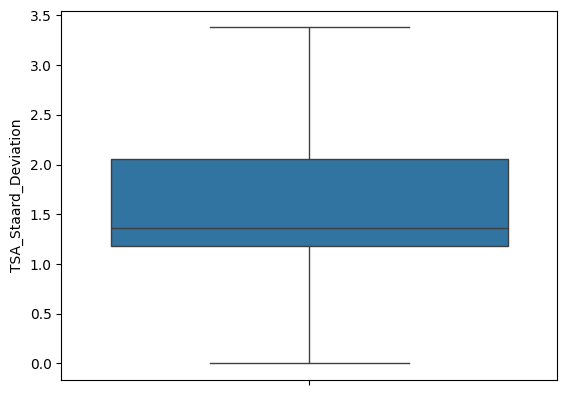

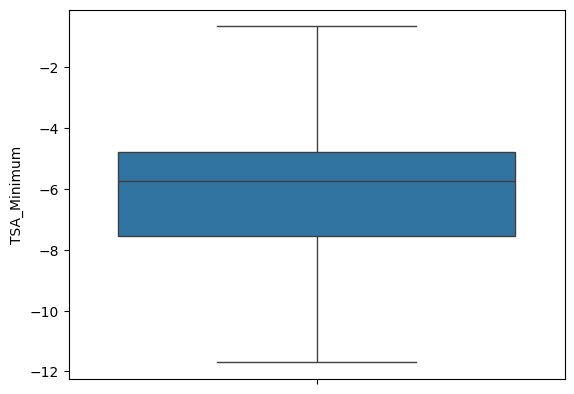

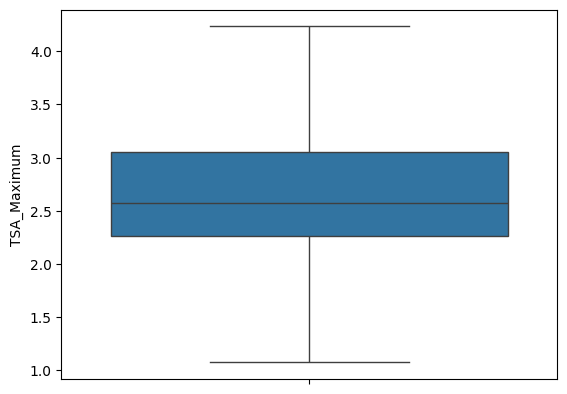

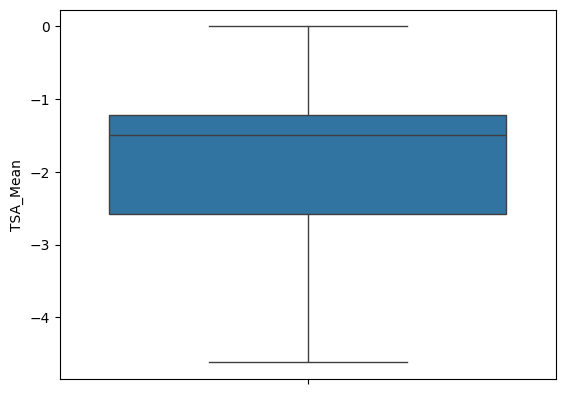

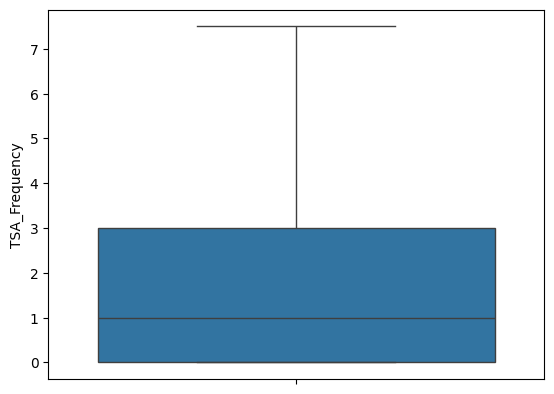

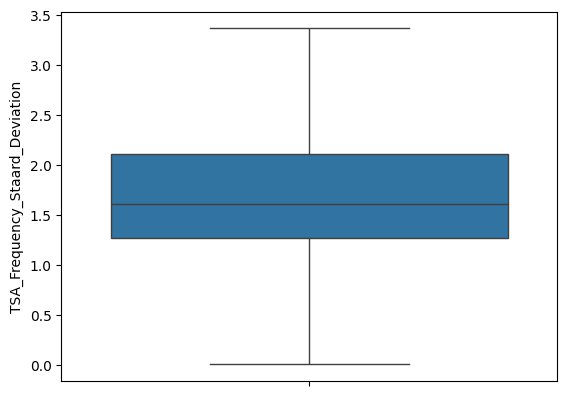

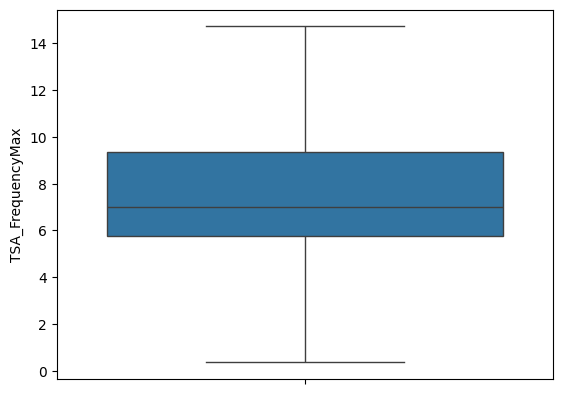

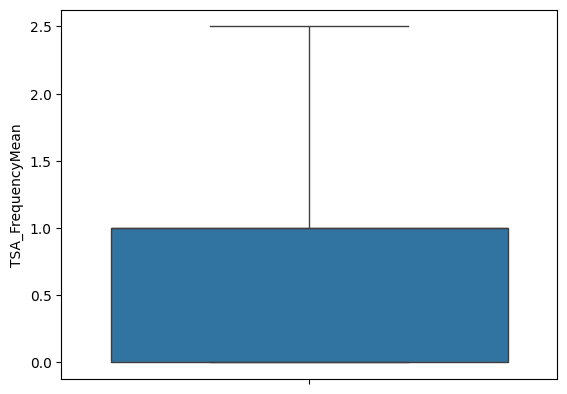

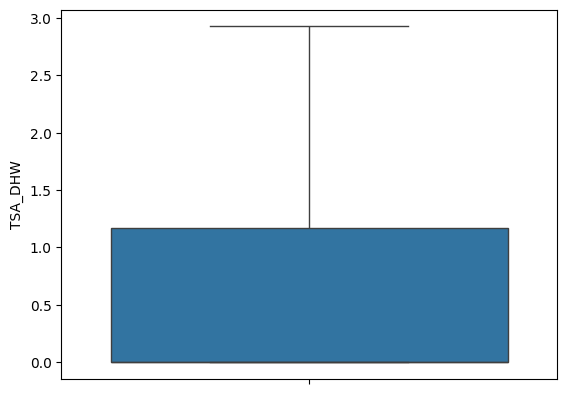

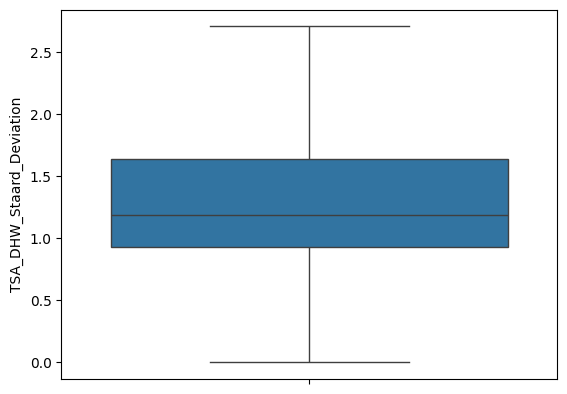

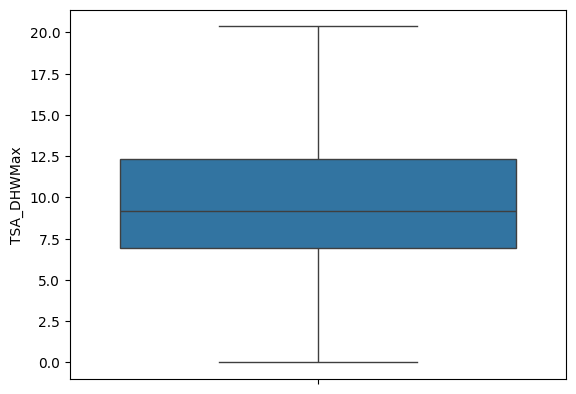

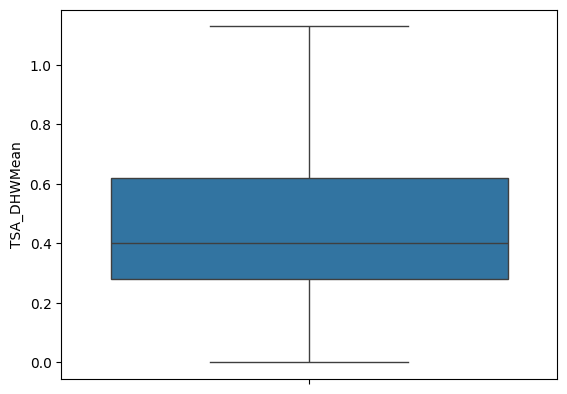

In [14]:
for i in ['Latitude_Degrees', 'Longitude_Degrees','Distance_to_Shore', 'Turbidity', 'Cyclone_Frequency', 'Date_Month',
          'Depth_m', 'Percent_Cover', 'Percent_Bleaching', 'ClimSST',
          'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum',
           'Temperature_Maximum', 'Temperature_Kelvin_Staard_Deviation', 'Wispeed',
           'SSTA', 'SSTA_Staard_Deviation', 'SSTA_Mean', 'SSTA_Minimum',
           'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Staard_Deviation',
           'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
           'SSTA_DHW_Staard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
           'TSA_Staard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
           'TSA_Frequency', 'TSA_Frequency_Staard_Deviation', 'TSA_FrequencyMax',
           'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Staard_Deviation',
           'TSA_DHWMax', 'TSA_DHWMean']:
    sns.boxplot(dfcoralv1[i])
    plt.show()

In [15]:
wisker (dfcoralv1['Percent_Bleaching'])

(-14.413916768133591, 24.023194613555987)

### Again check relationshp between different columns for analysis

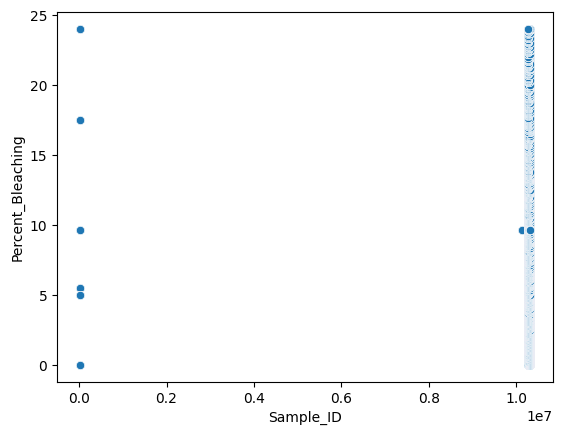

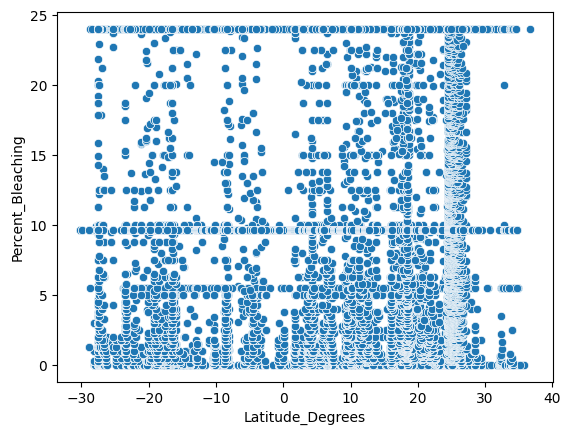

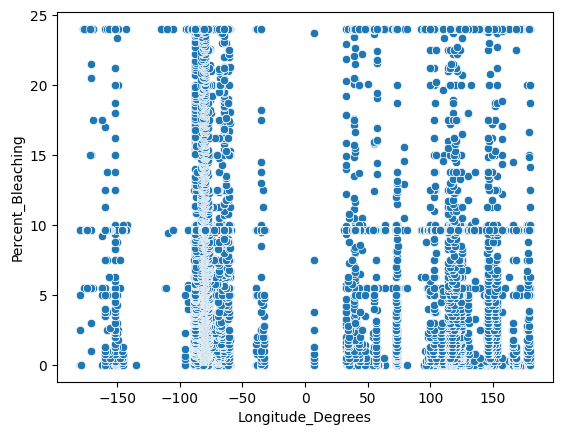

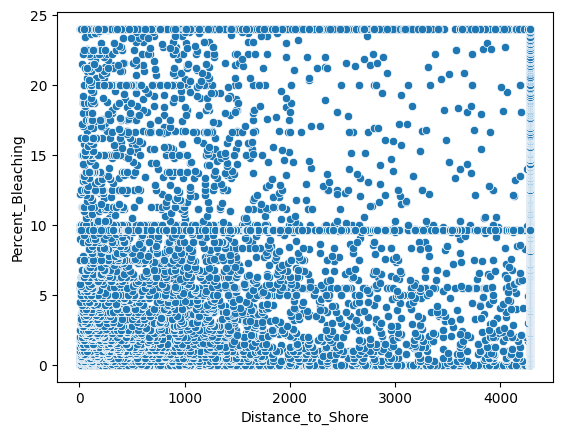

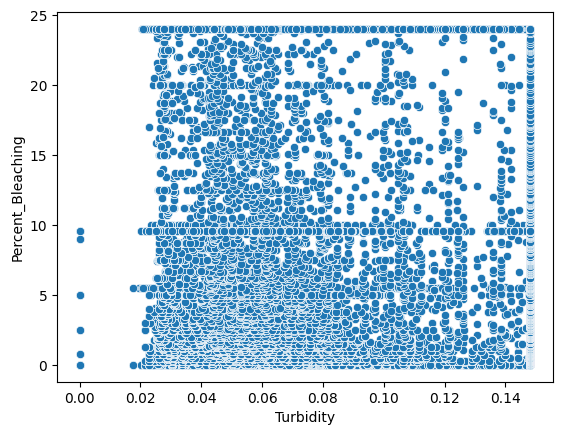

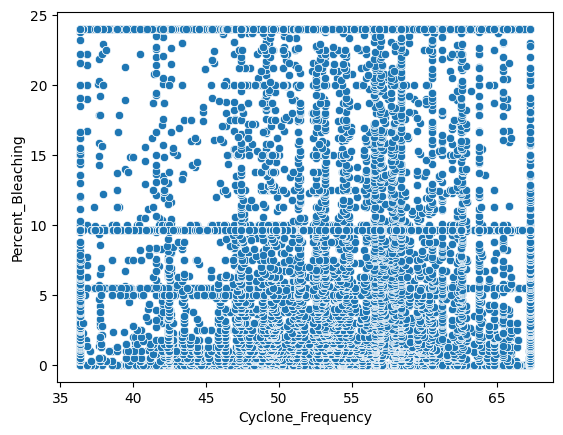

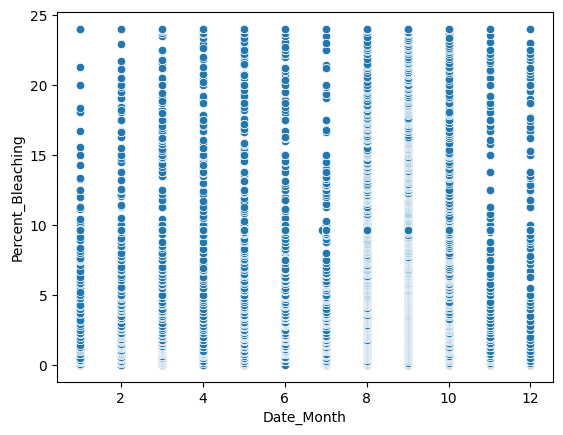

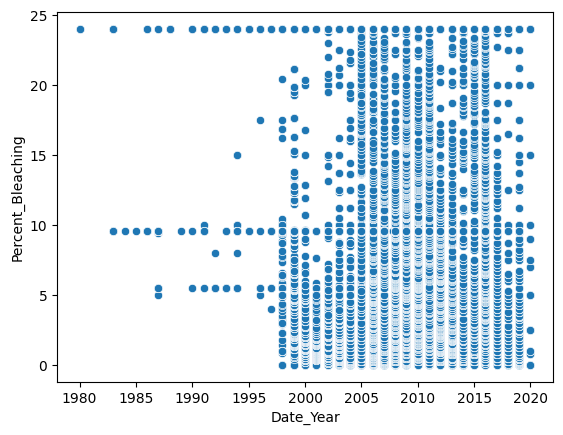

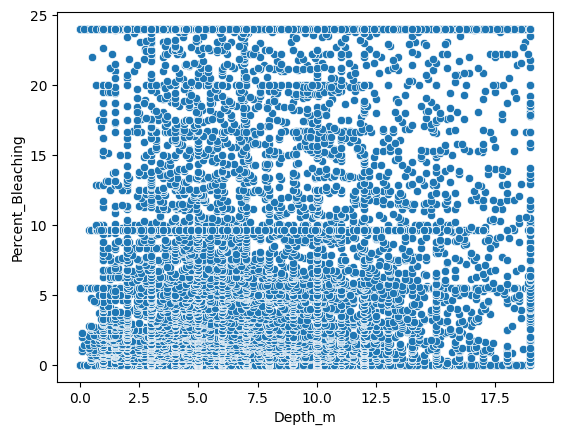

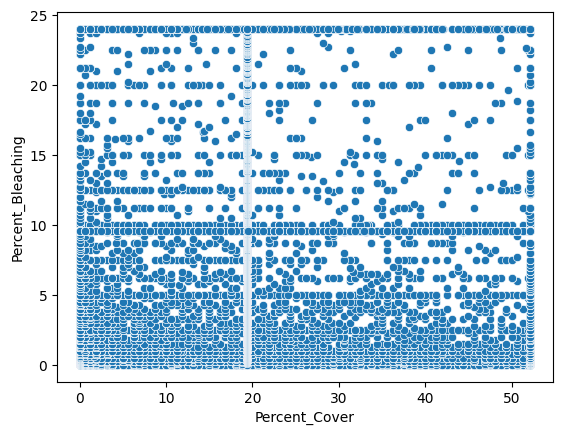

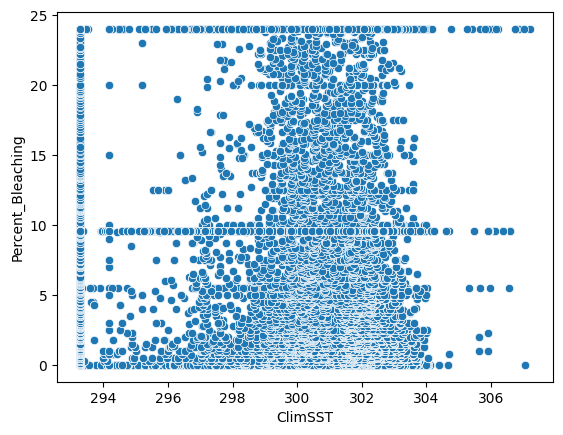

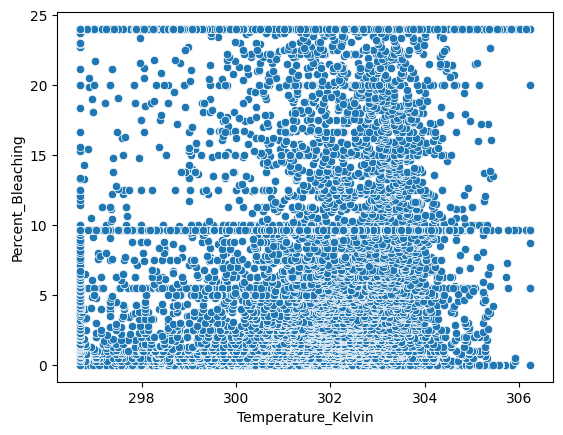

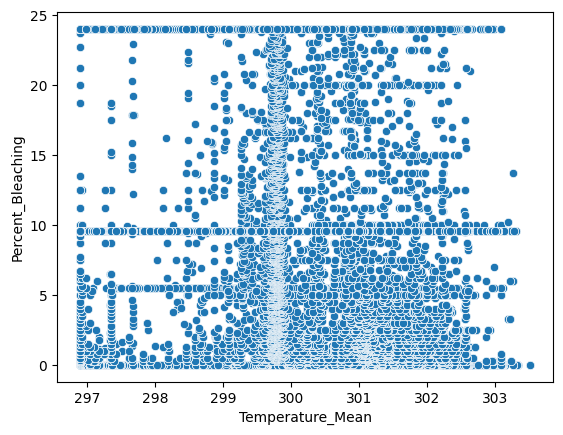

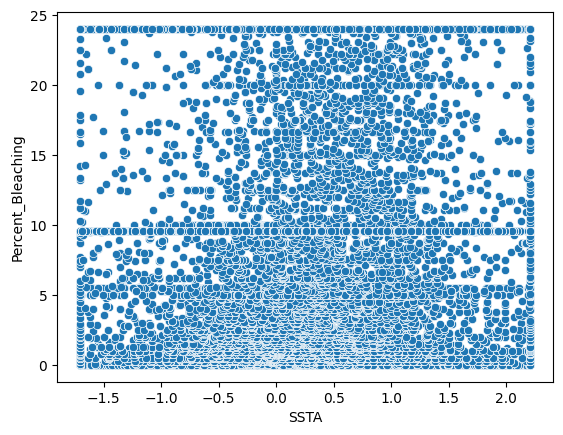

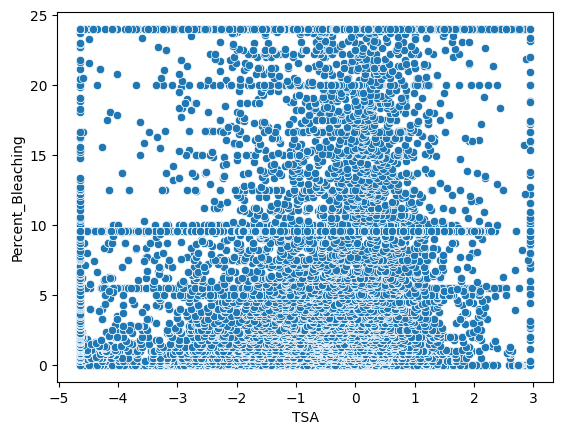

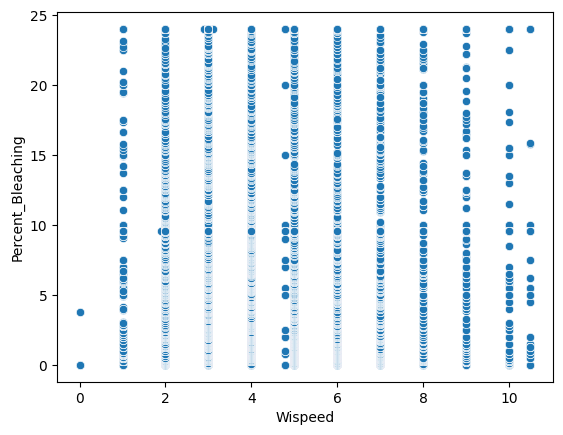

In [16]:
for i in ['Sample_ID', 'Latitude_Degrees', 'Longitude_Degrees',
       'Distance_to_Shore', 'Turbidity', 'Cyclone_Frequency', 'Date_Month',
       'Date_Year', 'Depth_m', 'Percent_Cover', 'ClimSST', 'Temperature_Kelvin',
        'Temperature_Mean','SSTA','TSA','Wispeed',]:
        sns.scatterplot(data=dfcoralv1, x=i,y='Percent_Bleaching')
        plt.show()

## encoding the object datatypes

In [19]:
#dfcoralv1.dtypes
dummiesDataset=pd.get_dummies(data='dfcoralv1',columns=['Data_Source','Ocean_Name','Reef_ID','Realm_Name','Ecoregion_Name',
                                         'Country_Name','State_Isla_Province_Name','City_Town_Name','Exposure',
                                         'Bleaching_Level'],drop_first=True)
dummiesDataset

""
0
1
2
3
4
5
6
7
8


In [21]:
dfcoralv1.dtypes

Site_ID                                 object
Sample_ID                              float64
Data_Source                             object
Latitude_Degrees                       float64
Longitude_Degrees                      float64
Ocean_Name                              object
Reef_ID                                 object
Realm_Name                              object
Ecoregion_Name                          object
Country_Name                            object
State_Isla_Province_Name                object
City_Town_Name                          object
Distance_to_Shore                      float64
Exposure                                object
Turbidity                              float64
Cyclone_Frequency                      float64
Date_Month                             float64
Date_Year                              float64
Depth_m                                float64
Substrate_Name                          object
Percent_Cover                          float64
Bleaching_Lev

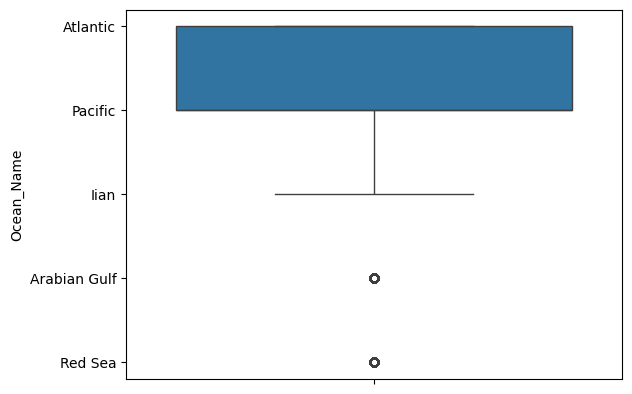

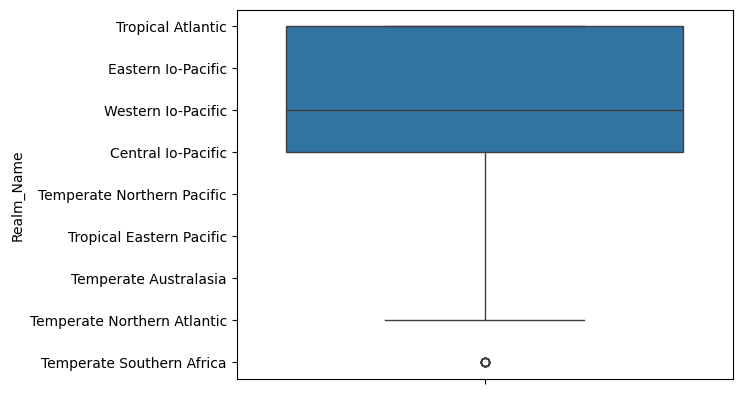

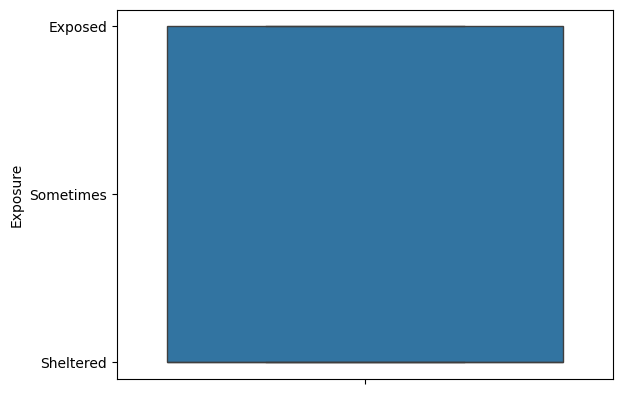

In [23]:
for i in ['Ocean_Name','Realm_Name','Exposure']:
    sns.boxplot(dfcoralv1[i])
    plt.show()

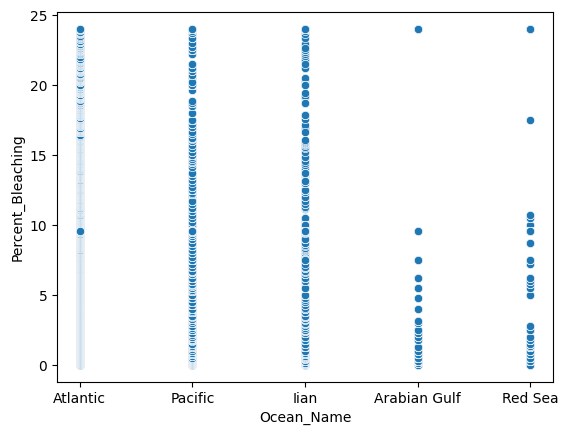

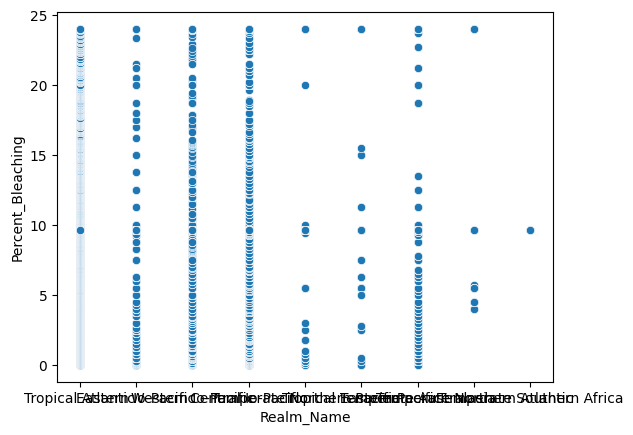

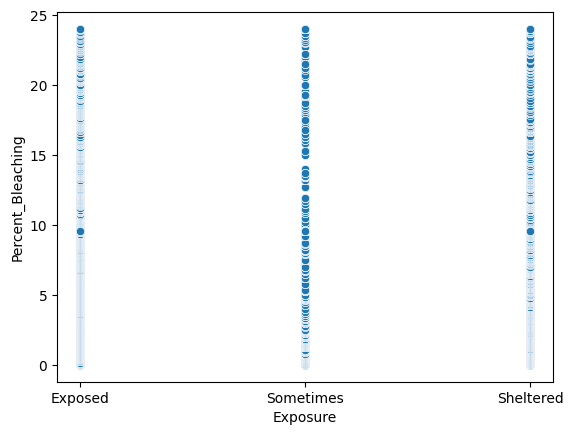

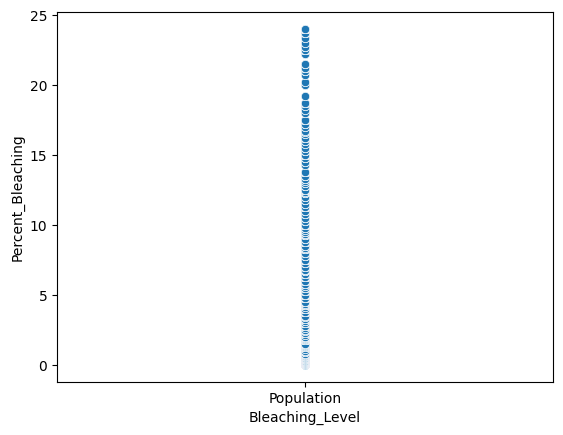

In [25]:
for i in ['Ocean_Name','Realm_Name','Exposure','Bleaching_Level']:
        sns.scatterplot(data=dfcoralv1, x=i,y='Percent_Bleaching')
        plt.show()

In [26]:
dfcoralv1.isnull().sum()

Site_ID                                    0
Sample_ID                                  0
Data_Source                               23
Latitude_Degrees                           0
Longitude_Degrees                          0
Ocean_Name                                23
Reef_ID                                12540
Realm_Name                                23
Ecoregion_Name                            26
Country_Name                              24
State_Isla_Province_Name                 122
City_Town_Name                          1155
Distance_to_Shore                          0
Exposure                                  23
Turbidity                                  0
Cyclone_Frequency                          0
Date_Month                                 0
Date_Year                                  0
Depth_m                                    0
Substrate_Name                         12668
Percent_Cover                              0
Bleaching_Level                        18830
Percent_Bl

In [ ]:
dfcoralv1.to_csv('../Data/CoralV2.csv')